__8**.__ С помощью метода наименьших квадратов (МНК) подобрать значения параметров $a$ и $b$ для сигмоидальной функции $$y=\frac{1}{1+e^{-(ax+b)}}$$ 

по заданному распределению. Построить график.

Представим уравнение в неявном виде:

$$y-\frac{1}{1+e^{-(ax+b)}}=0$$

Возьмем правую часть в виде погрешности $\varepsilon$ для каждой точки:

$$y_{i}-\frac{1}{1+e^{-(ax_{i}+b)}}=\varepsilon_{i}$$

Составим функцию ошибок:

$$U(a,b)=\varepsilon^2_{1}+\varepsilon^2_{2}+\varepsilon^2_{3}+\varepsilon^2_{4}+...+\varepsilon^2_{n}$$

$$U'_{a}=\sum\limits_{i=1}^n\Bigl(\Bigl(y_{i}-\frac{1}{1+e^{-(ax_{i}+b)}}\Bigr)^2\Bigr)'$$

$$\Bigl(\Bigl(y_{i}-\frac{1}{1+e^{-(ax_{i}+b)}}\Bigr)^2\Bigr)'=2\Bigl(y_{i}-\frac{1}{1+e^{-(ax_{i}+b)}}\Bigr) \cdot (-1)\cdot(-1)\cdot \frac{1}{(1+e^{-(ax_{i}+b)})^2} \cdot e^{-(ax_{i}+b)} \cdot (-x_{i})=$$

$$=\frac{2x_{i}e^{-(ax_{i}+b)}}{(1+e^{-(ax_{i}+b)})^3}-\frac{2x_{i}y_{i}e^{-(ax_{i}+b)}}{(1+e^{-(ax_{i}+b)})^2}$$

$$U'_{b}=\sum\limits_{i=1}^n\Bigl(\Bigl(y_{i}-\frac{1}{1+e^{-(ax_{i}+b)}}\Bigr)^2\Bigr)'$$

$$\Bigl(\Bigl(y_{i}-\frac{1}{1+e^{-(ax_{i}+b)}}\Bigr)^2\Bigr)'=2\Bigl(y_{i}-\frac{1}{1+e^{-(ax_{i}+b)}}\Bigr) \cdot (-1)\cdot(-1)\cdot \frac{1}{(1+e^{-(ax_{i}+b)})^2} \cdot e^{-(ax_{i}+b)} \cdot (-1)=$$

$$=\frac{2e^{-(ax_{i}+b)}}{(1+e^{-(ax_{i}+b)})^3}-\frac{2y_{i}e^{-(ax_{i}+b)}}{(1+e^{-(ax_{i}+b)})^2}$$


$$\begin{cases}
   U'_{a}=\sum\limits_{i=1}^n(\frac{2x_{i}e^{-(ax_{i}+b)}}{(1+e^{-(ax_{i}+b)})^3}-\frac{2x_{i}y_{i}e^{-(ax_{i}+b)}}{(1+e^{-(ax_{i}+b)})^2})=0, \\
   U'_{b}=\sum\limits_{i=1}^n(\frac{2e^{-(ax_{i}+b)}}{(1+e^{-(ax_{i}+b)})^3}-\frac{2y_{i}e^{-(ax_{i}+b)}}{(1+e^{-(ax_{i}+b)})^2})=0 
 \end{cases}$$

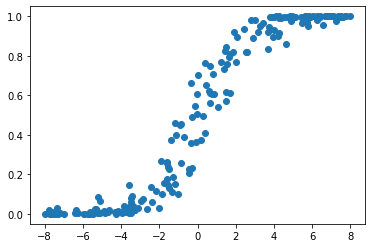

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Задаем рандомное распределение точек
xi = np.random.uniform(-8, 8, 200)
yi = 1/(1+np.exp(-np.random.uniform(0.5, 1.5, 200)*xi-np.random.uniform(-1, 1, 200)))
plt.plot(xi,yi, marker="o", ls="")

plt.show()

In [6]:
from scipy.optimize import fsolve
import math

def equations(p):
    a, b = p
    u_a = ((2*xi*np.exp(-a*xi-b))/((1+np.exp(-a*xi-b))^3)-(2*xi*yi*np.exp(-a*xi-b))/((1+np.exp(-a*xi-b))^2)).sum()
    u_b = ((2*np.exp(-a*xi-b))/((1+np.exp(-a*xi-b))^3)-(2*yi*np.exp(-a*xi-b))/((1+np.exp(-a*xi-b))^2)).sum()
    return (u_a, u_b)

a, b =  fsolve(equations, (1, 1))
print (a, b)

TypeError: ufunc 'bitwise_xor' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''